# Importing all the necessary Libraries

In [477]:
# Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # to remove warnings
warnings.filterwarnings("ignore")

# Loading the files to be Analysed

In [480]:
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Check for missing values and Duplicate values in Customer.csv

In [483]:
# Checking for missing values
print(customers_df.isnull().sum())

# Check for duplicates
print(customers_df.duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
0


# Check for missing values and Duplicate values in Products.csv

In [486]:
# Check for missing values
print(products_df.isnull().sum())

# Checking for duplicates
print(products_df.duplicated().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
0


# Check for missing values and Duplicate values in Transactions.csv

In [489]:
# Checking for missing values
print(transactions_df.isnull().sum())

# Chack for duplicates
print(transactions_df.duplicated().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0


# Plots 

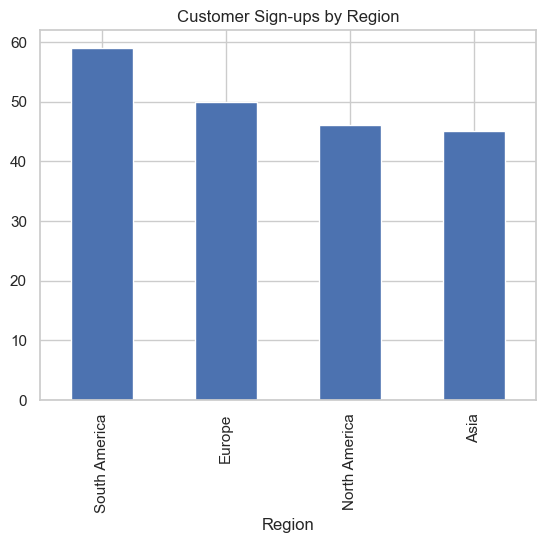

In [492]:
#plot
signup_by_region.plot(kind='bar', title="Customer Sign-ups by Region")
plt.show()


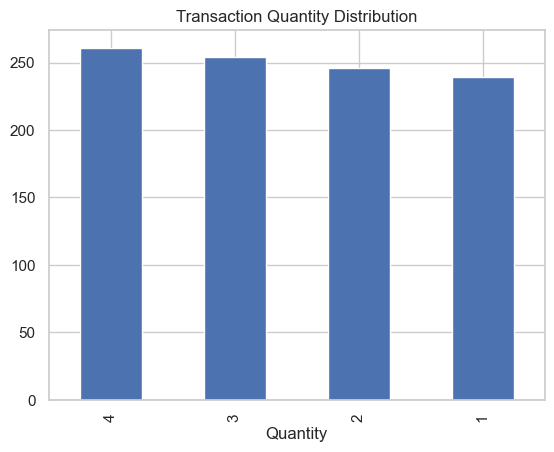

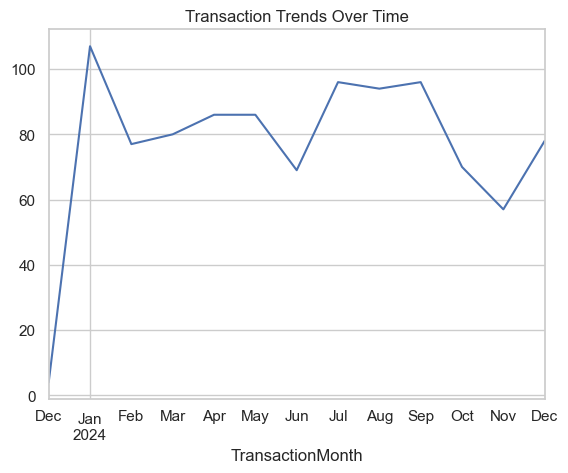

In [494]:
# Transactions for plot
quantity_distribution.plot(kind='bar', title="Transaction Quantity Distribution")
plt.show()

transaction_trends.plot(kind='line', title="Transaction Trends Over Time")
plt.show()


# Descriptions 

In [497]:
print(products_df['Price'].describe())


count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [499]:
total_revenue = transactions_df['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue}")

Total Revenue: $689995.56


# Here we are merging the datasets

In [502]:
# change to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

transactions_products = pd.merge(transactions_df, products_df, on="ProductID", how="left")
full_data = pd.merge(transactions_products, customers_df, on="CustomerID", how="left")

#knowedge about merged
print("Merged Dataset Overview:\n")
print("Shape of Dataset :",full_data.shape,"\n")
print("Info of Dataset :")
print(full_data.info(),"\n")
print("Head of Dataset:")
print(full_data.head(),"\n")

print("Missing Values in Merged Dataset:")
print(full_data.isnull().sum(),"\n")

print("Duplicate Records in Merged Dataset:")
print(full_data.duplicated().sum())


Merged Dataset Overview:

Shape of Dataset : (1000, 13) 

Info of Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   Price_y          1000 non-null   float64       
 10  CustomerName     1000 non-null   object        
 11  Region           1000 non-null   object        
 12  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](

In [504]:
print("\nStatistical Summary (Numerical Columns):")
print(full_data.describe())

print("\nStatistical Summary (Categorical Columns):")
print(full_data.describe(include="object"))

print("\nUnique Values in Each Column:")
for column in full_data.columns:
    print(f"{column}: {full_data[column].nunique()} unique values")

numerical_data = full_data.select_dtypes(include=["number"])

print("\nRegion Distribution:")
print(full_data['Region'].value_counts())

print("\nProduct Category Distribution:")
print(full_data['Category'].value_counts())

print("\nTop 10 Most Purchased Products:")
print(full_data['ProductName'].value_counts().head(10))



Statistical Summary (Numerical Columns):
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y                     SignupDate  
count  1000.00000                           1000  
mean    272.55407  2023-07-09 02:49:55.199999744  
min      16.08000            2022-01-22 00:00:00  
25%     147.95000            2022-09-17 12:00:00  


In [506]:
# save it
full_data.to_csv("Full_Data.csv", index=False)

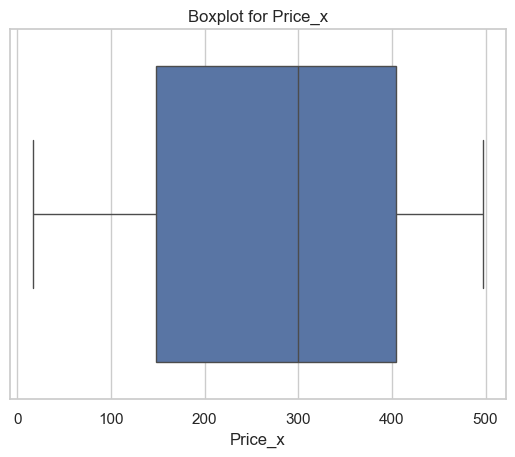

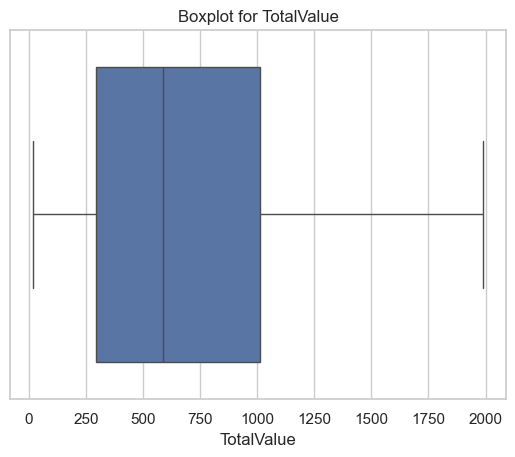

Outliers in TotalValue: 0


In [508]:
# Detecting thee outliers 

sns.boxplot(x=full_data['Price_x'])
plt.title('Boxplot for Price_x')
plt.show()

sns.boxplot(x=full_data['TotalValue'])
plt.title('Boxplot for TotalValue')
plt.show()

# Identify outliers using IQR method for 'TotalValue'
Q1 = full_data['TotalValue'].quantile(0.25)
Q3 = full_data['TotalValue'].quantile(0.75)
IQR = Q3 - Q1
outliers = full_data[(full_data['TotalValue'] < (Q1 - 1.5 * IQR)) | (full_data['TotalValue'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in TotalValue: {outliers.shape[0]}")


# Heatmap

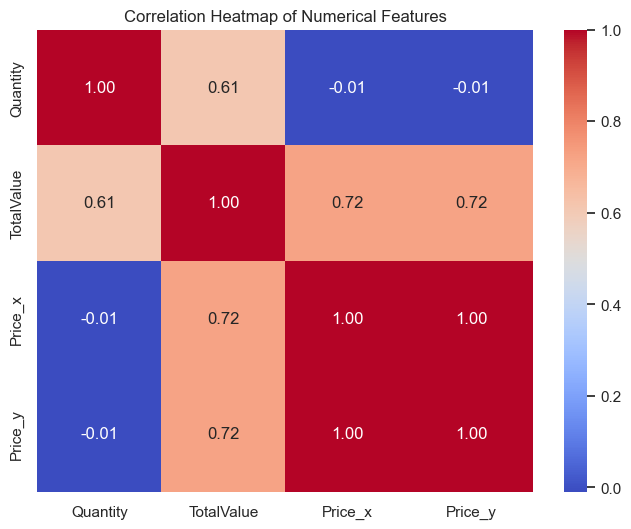

In [511]:
corr = full_data[['Quantity', 'TotalValue', 'Price_x', 'Price_y']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Plots To Study The Behaviour

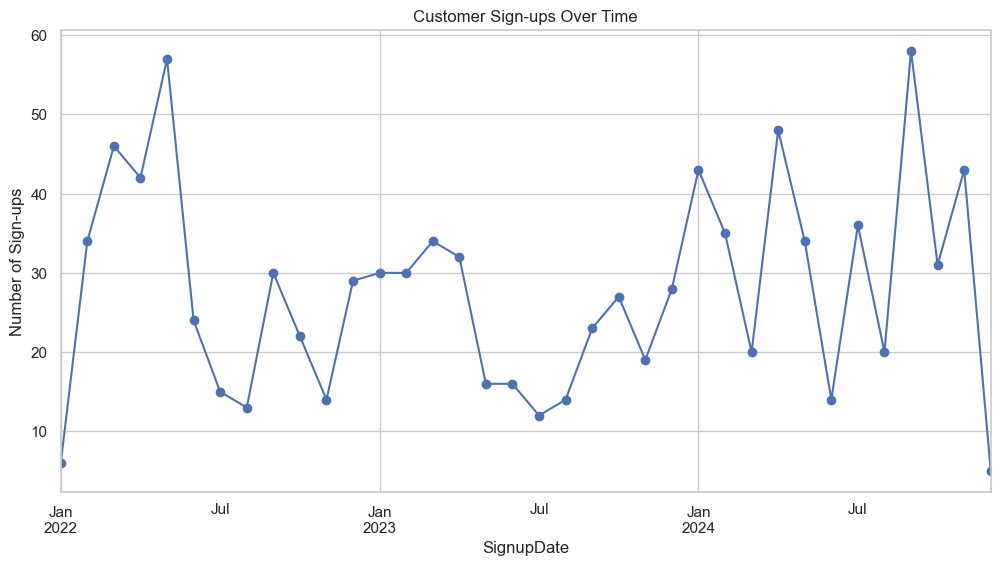

In [514]:

signups_over_time = full_data.groupby(full_data['SignupDate'].dt.to_period('M')).size()

# plott
plt.figure(figsize=(12,6))
signups_over_time.plot(kind='line', marker='o', title='Customer Sign-ups Over Time')
plt.ylabel('Number of Sign-ups')
plt.show()


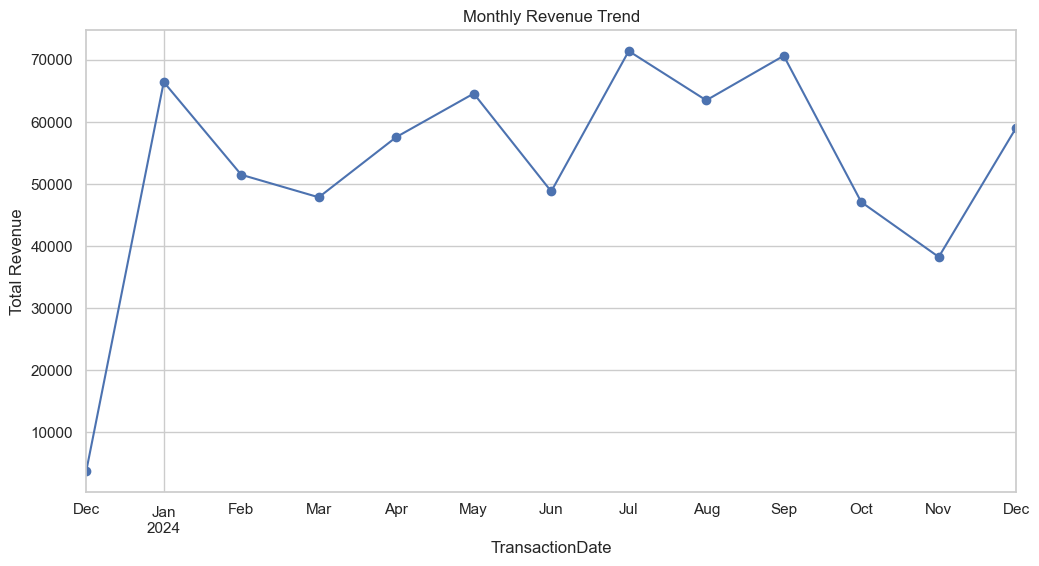

In [516]:
revenue_by_month = full_data.groupby(full_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot we here
plt.figure(figsize=(12,6))
revenue_by_month.plot(kind='line', marker='o', title='Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.show()


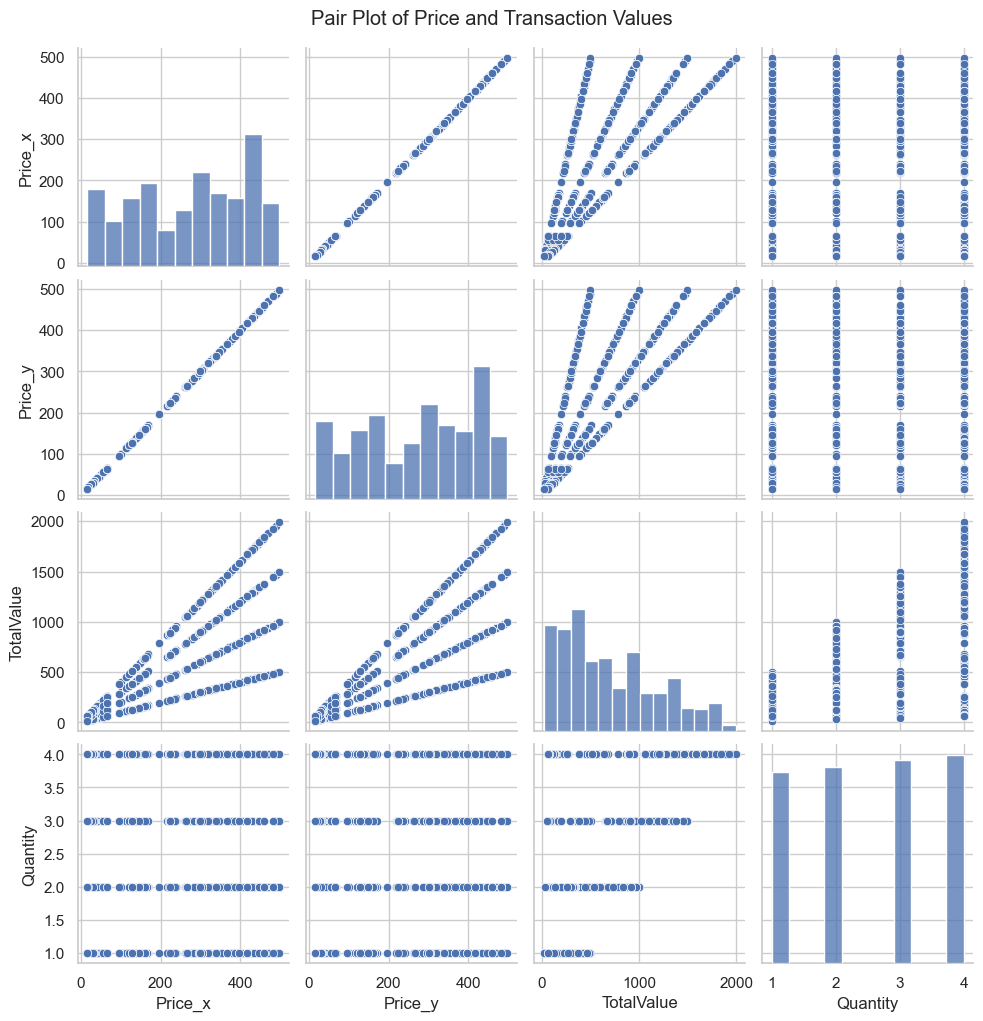

In [518]:
#plot plot
sns.pairplot(full_data[['Price_x', 'Price_y', 'TotalValue', 'Quantity']])
plt.suptitle('Pair Plot of Price and Transaction Values', y=1.02)
plt.show()


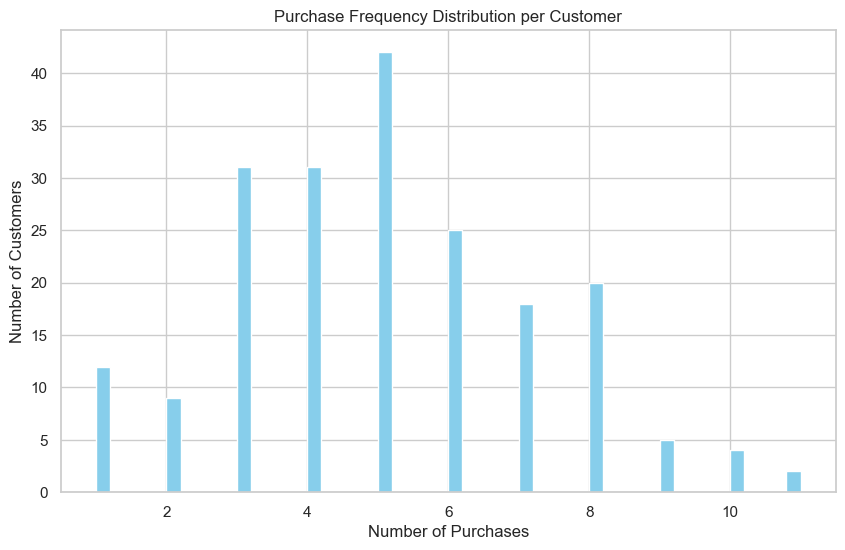

In [519]:
customer_purchase_frequency = full_data.groupby('CustomerID').size()

# we plot
plt.figure(figsize=(10,6))
customer_purchase_frequency.hist(bins=50, color='skyblue')
plt.title('Purchase Frequency Distribution per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


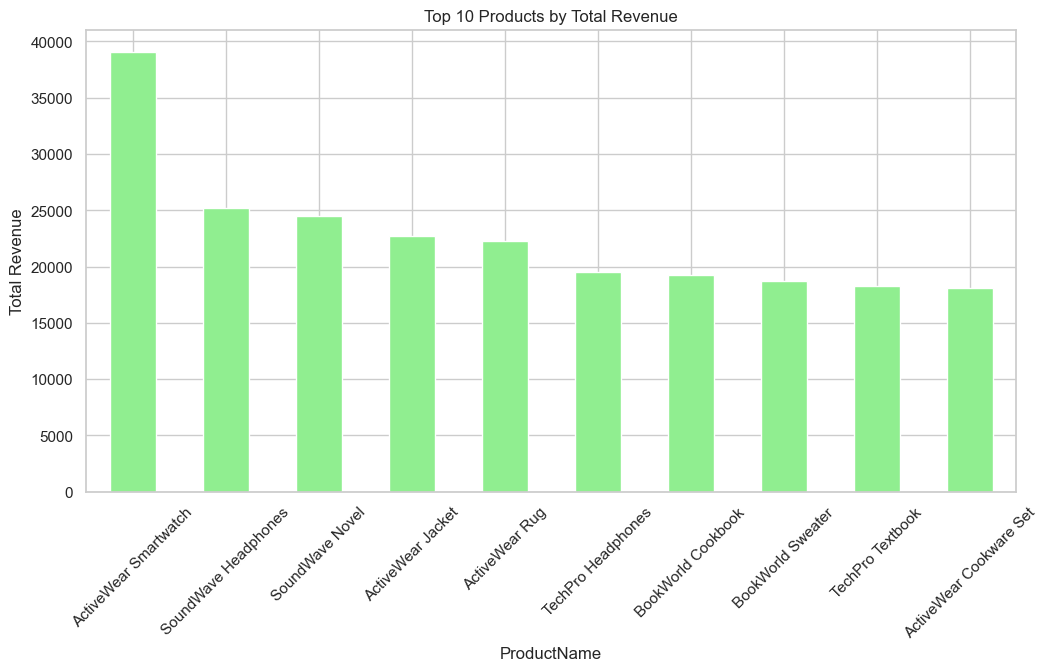

In [522]:
revenue_by_product = full_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

# here we plot
plt.figure(figsize=(12,6))
revenue_by_product.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Total Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


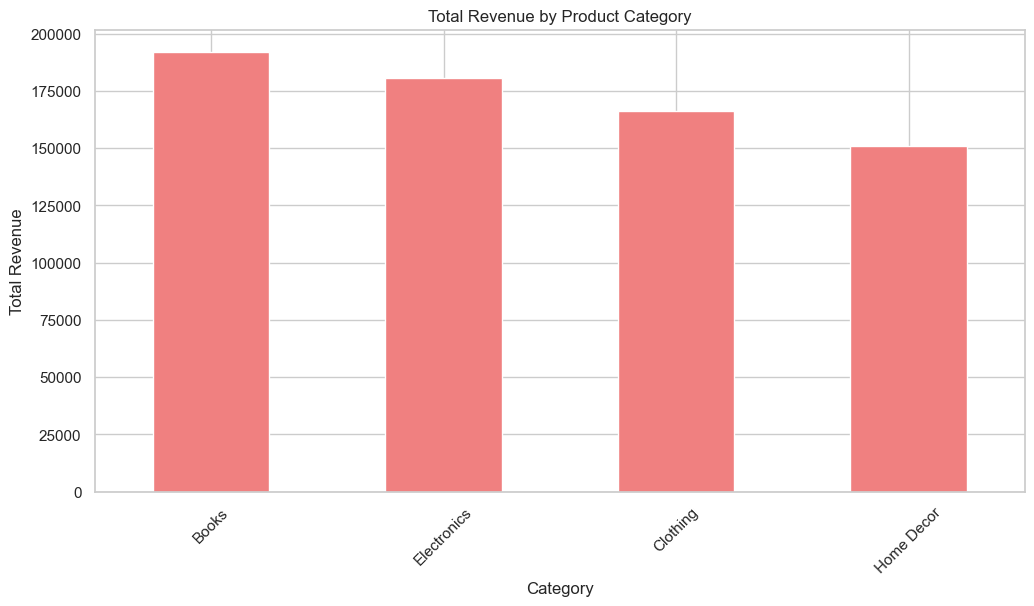

In [524]:
revenue_by_category = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

#plot
plt.figure(figsize=(12,6))
revenue_by_category.plot(kind='bar', color='lightcoral')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


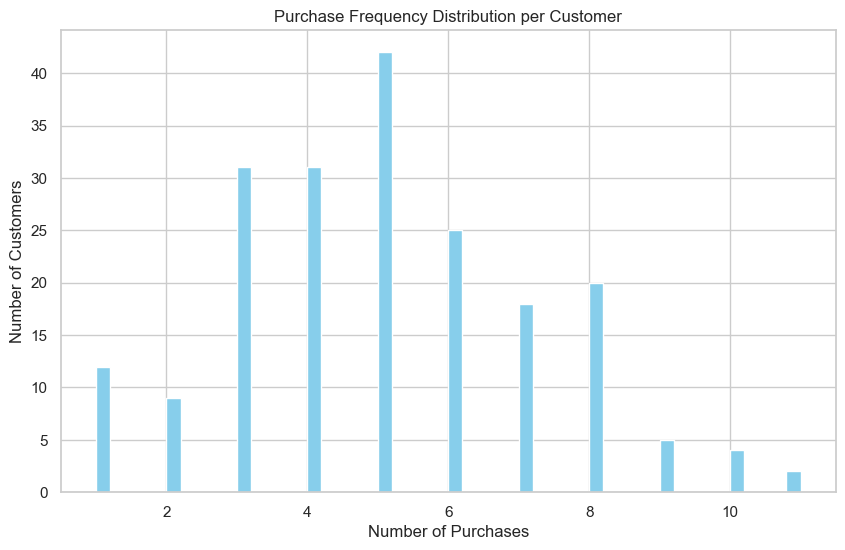

In [526]:
customer_purchase_frequency = full_data.groupby('CustomerID').size()

# Plot 
plt.figure(figsize=(10,6))
customer_purchase_frequency.hist(bins=50, color='skyblue')
plt.title('Purchase Frequency Distribution per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


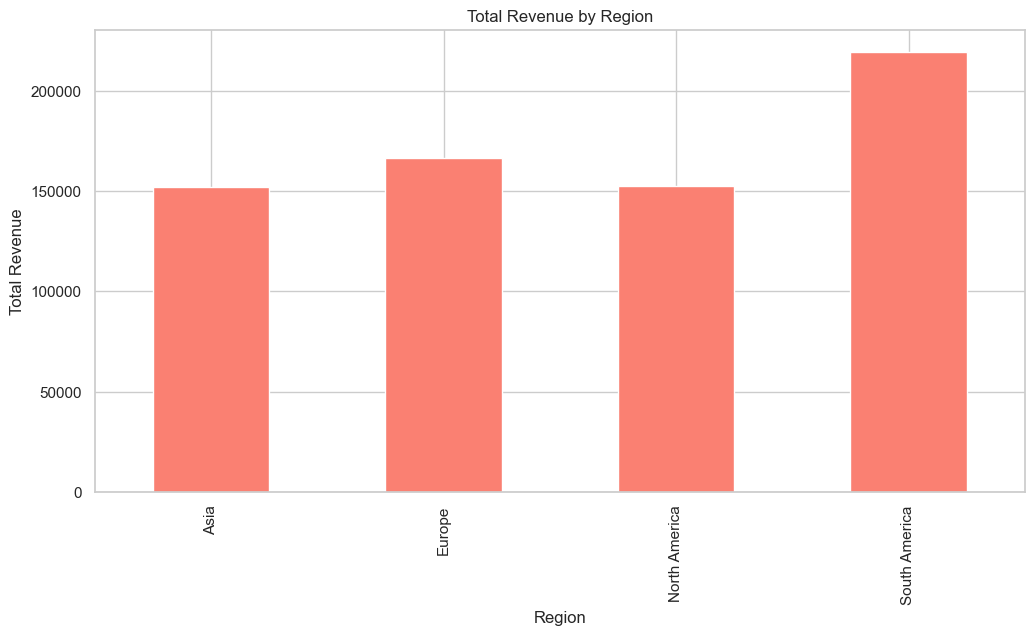

In [528]:
revenue_by_region = full_data.groupby('Region')['TotalValue'].sum()

# Plotting
plt.figure(figsize=(12,6))
revenue_by_region.plot(kind='bar', color='salmon')
plt.title('Total Revenue by Region')
plt.ylabel('Total Revenue')
plt.show()


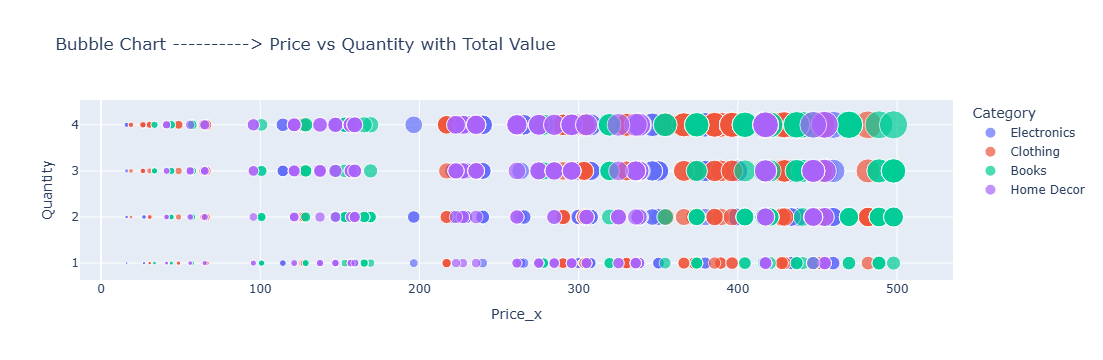

In [530]:
import plotly.express as px

fig = px.scatter(
    full_data,
    x='Price_x', 
    y='Quantity', 
    size='TotalValue', 
    color='Category',
    hover_name='ProductName',
    title="Bubble Chart ----------> Price vs Quantity with Total Value"
)
fig.show()


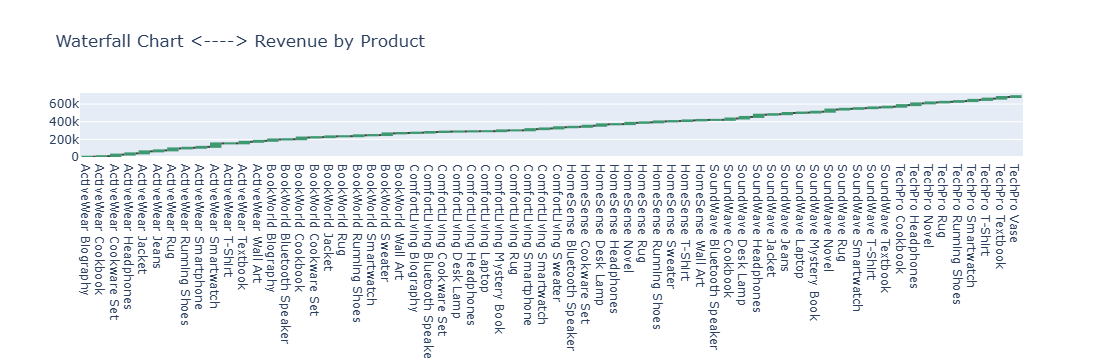

In [532]:
import plotly.graph_objects as go
revenue_by_product = full_data.groupby('ProductName')['TotalValue'].sum().reset_index()

# chart
fig = go.Figure(go.Waterfall(
    x=revenue_by_product['ProductName'],
    y=revenue_by_product['TotalValue'],
    measure=['relative' for _ in range(len(revenue_by_product))],
    base=0
))

fig.update_layout(title="Waterfall Chart <----> Revenue by Product")
fig.show()



Top 10 Most Purchased Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


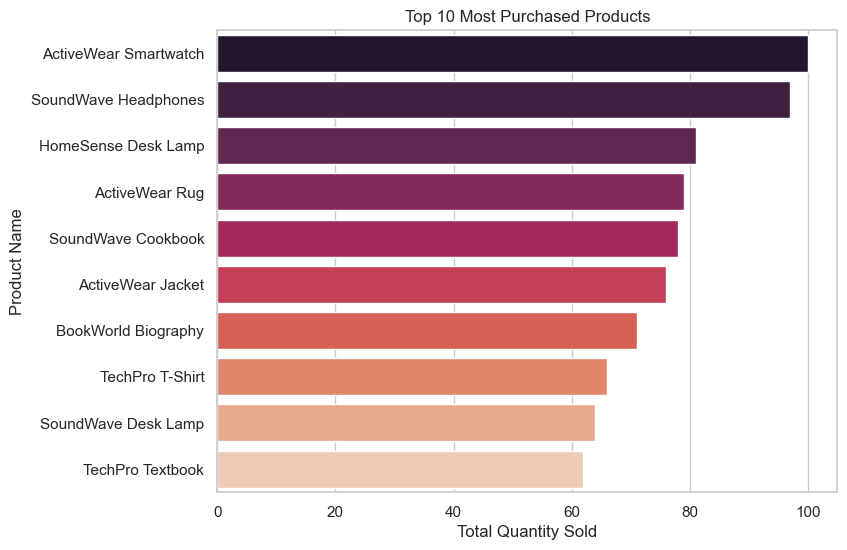

In [534]:
top_products = full_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Purchased Products:")
print(top_products)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# Testing

In [537]:
from scipy.stats import ttest_ind
north_america = full_data[full_data['Region'] == 'North America']['TotalValue']
south_america = full_data[full_data['Region'] == 'South America']['TotalValue']

t_stat, p_value = ttest_ind(north_america, south_america, equal_var=False)
print("T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in TotalValue between North America and South America.")
else:
    print("There is no significant difference in TotalValue between North America and South America.")


T-Test Results:
T-Statistic: -2.34, P-Value: 0.0194
There is a significant difference in TotalValue between North America and South America.


In [539]:
from scipy.stats import f_oneway
region_groups = [group['TotalValue'].values for name, group in full_data.groupby('Region')]

f_stat, p_value_anova = f_oneway(*region_groups)
print("One-Way ANOVA Results:")
print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_value_anova:.4f}")

if p_value_anova < 0.05:
    print("There is a significant difference in TotalValue across regions.")
else:
    print("There is no significant difference in TotalValue across regions.")


One-Way ANOVA Results:
F-Statistic: 2.02, P-Value: 0.1095
There is no significant difference in TotalValue across regions.


# Other different charts

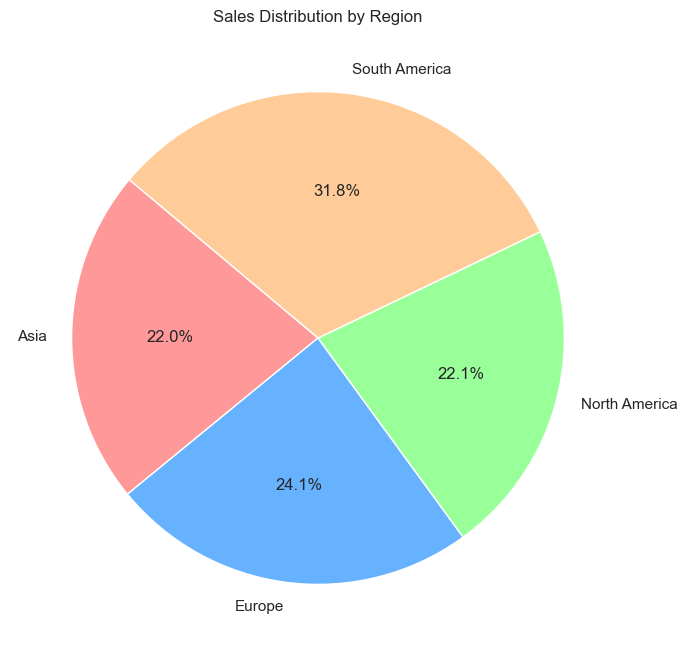

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [542]:
region_sales = full_data.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title("Sales Distribution by Region")
plt.ylabel("")  # Remove default y-axis label
plt.show()

signup_by_region = customers_df['Region'].value_counts()
print(signup_by_region)


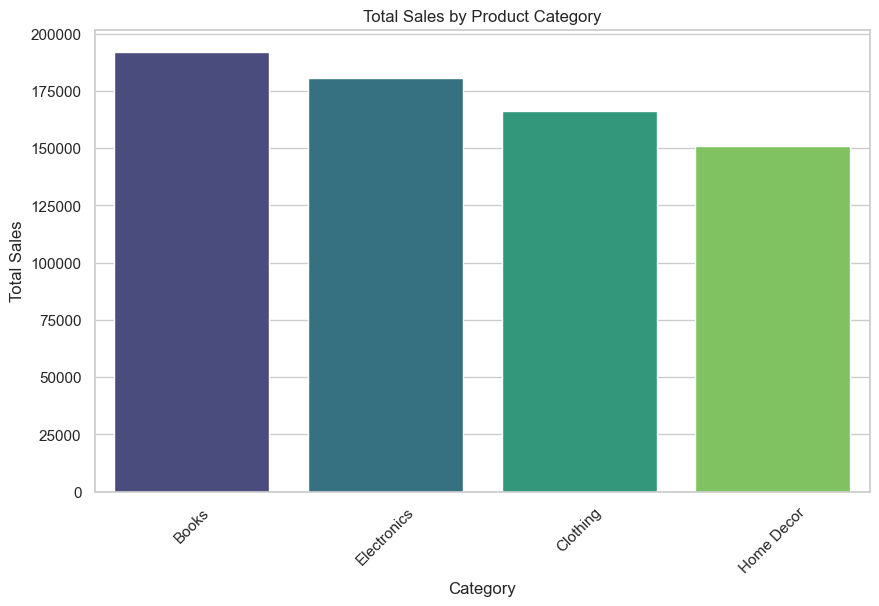

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [544]:
category_sales = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

category_distribution = products_df['Category'].value_counts()
print(category_distribution)


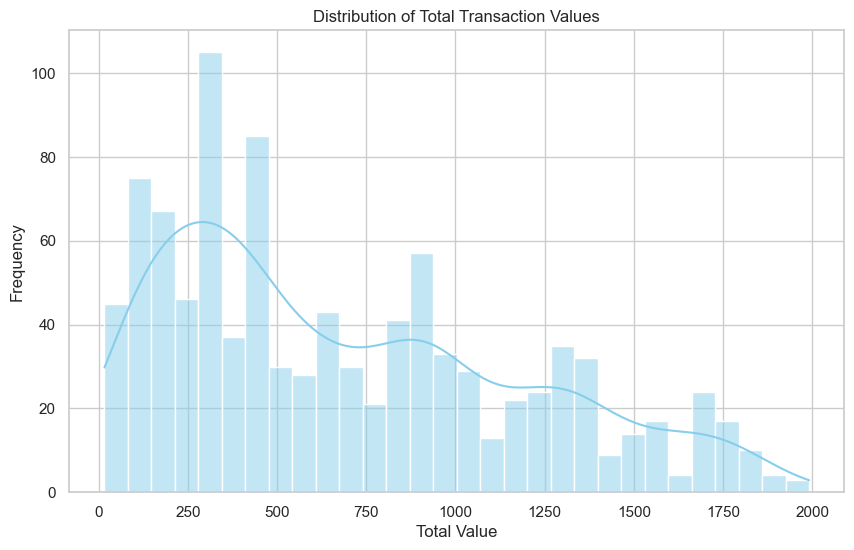

In [546]:
plt.figure(figsize=(10, 6)) #plot
sns.histplot(full_data['TotalValue'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Transaction Values")
plt.xlabel("Total Value")
plt.ylabel("Frequency")
plt.show()


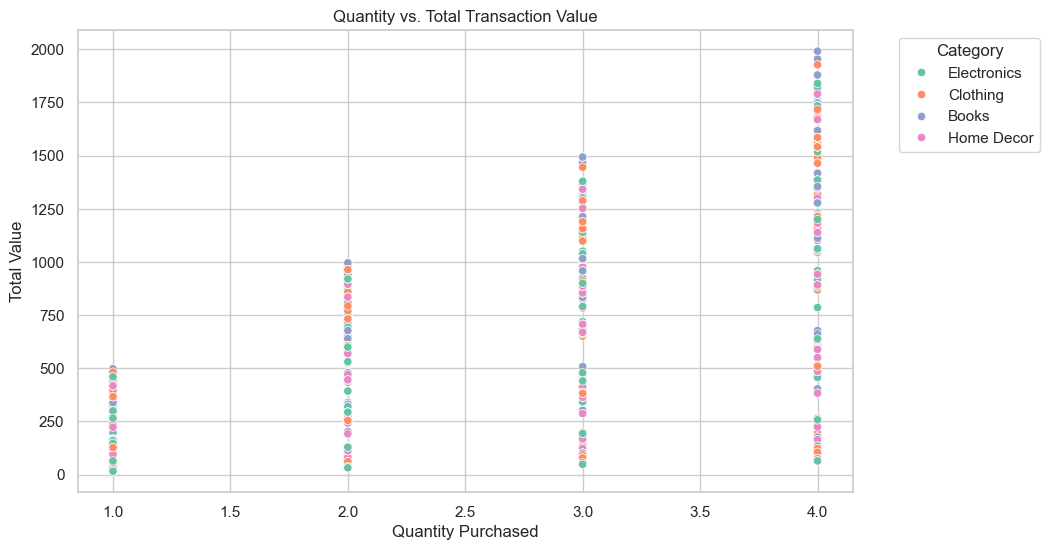

In [548]:
plt.figure(figsize=(10, 6)) #plot
sns.scatterplot(data=full_data, x='Quantity', y='TotalValue', hue='Category', palette='Set2')
plt.title("Quantity vs. Total Transaction Value")
plt.xlabel("Quantity Purchased")
plt.ylabel("Total Value")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


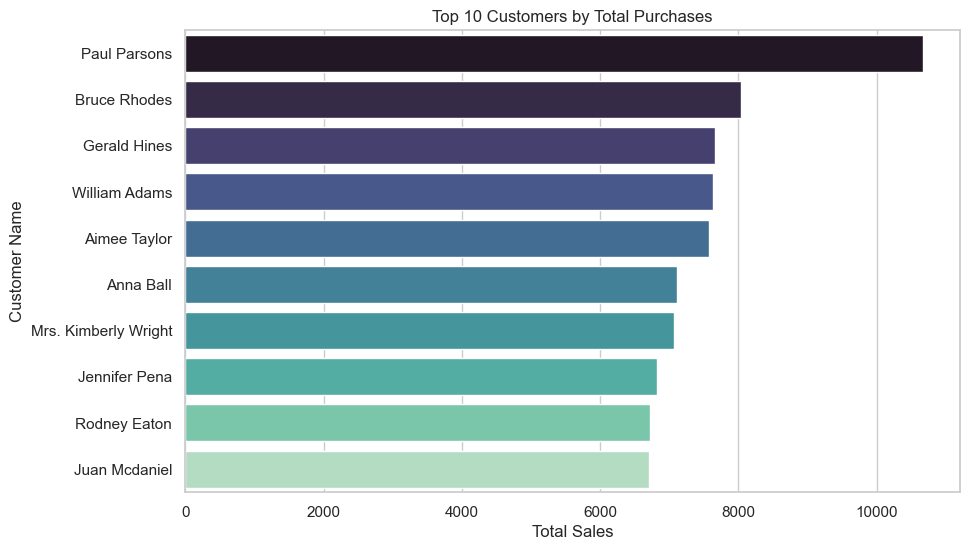

In [550]:
top_customers = full_data.groupby('CustomerName')['TotalValue'].sum().nlargest(10)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_customers.index, x=top_customers.values, palette='mako')
plt.title("Top 10 Customers by Total Purchases")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.show()


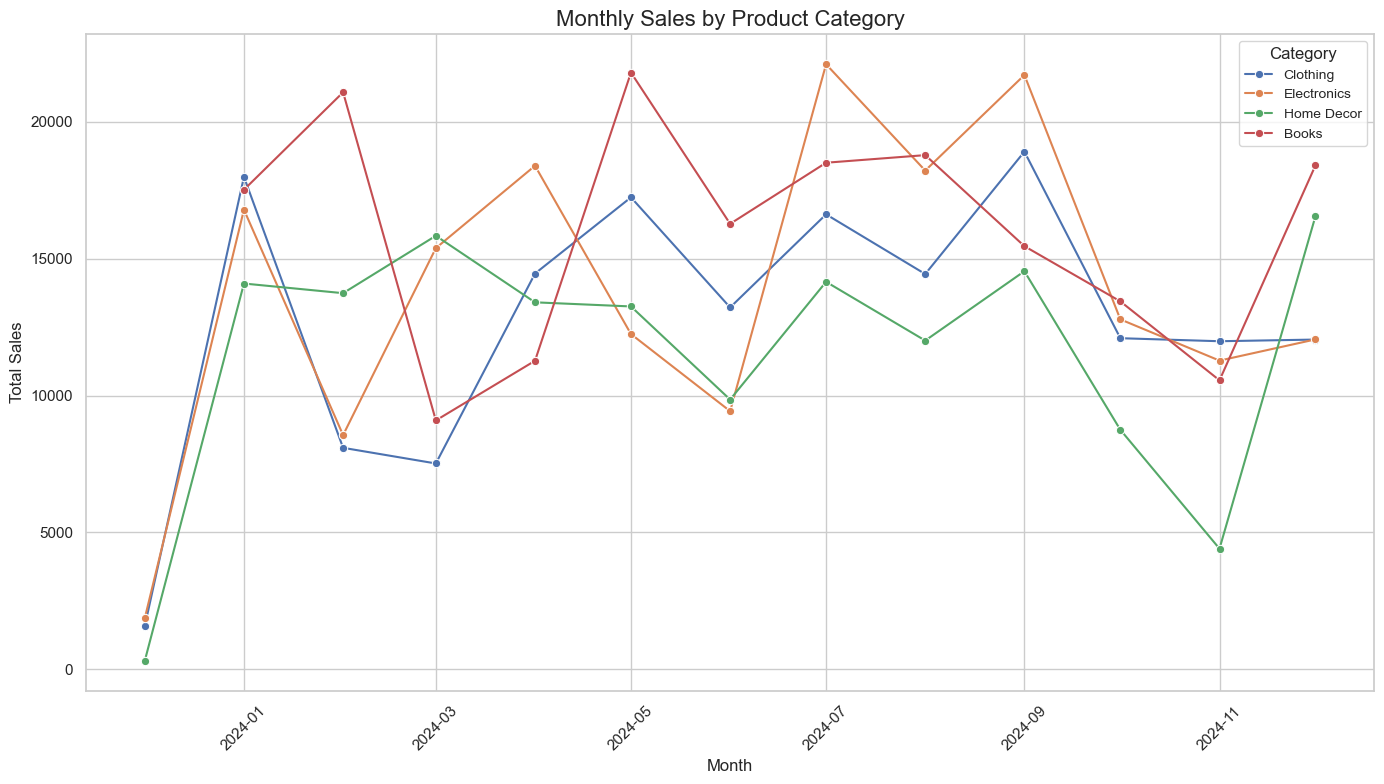

In [552]:
# To find out month vs sales
full_data["Month"] = full_data["TransactionDate"].dt.to_period("M")
monthly_sales_all = full_data.groupby(["Month", "Category"])["TotalValue"].sum().reset_index()
monthly_sales_all["Month"] = monthly_sales_all["Month"].dt.to_timestamp()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))


# To make a Line plot
sns.lineplot(
    data=monthly_sales_all, 
    x="Month", 
    y="TotalValue", 
    hue="Category", 
    marker="o")

plt.title("Monthly Sales by Product Category", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category", fontsize=10)
plt.tight_layout()
plt.show()
